In [37]:
import os
import shutil
from keras import layers, models
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
original_dataset_dir = r'E:\Keras\Dataset\dogs-vs-cats\train\train'

In [3]:
# Create a new base directory for your organized dataset
base_dir = 'E:\Keras\Dataset\dogs-vs-cats_small'
os.mkdir(base_dir)

In [4]:
# Create directories for training, validation, and test sets
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
# Create directories for cats and dogs in the training set
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [6]:
# Create directories for cats and dogs in the validation set
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [7]:
# Create directories for cats and dogs in the test set
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [8]:
# Copy the first 1,000 cat images to the train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
# Copy the next 500 cat images to the validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
# Copy the next 500 cat images to the test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
# Copy the first 1,000 dog images to the train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
# Copy the next 500 dog images to the validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
# Copy the next 500 dog images to the test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
print('Total training images:', len(os.listdir(train_cats_dir)))

Total training images: 1000


In [15]:
print('Total training images:', len(os.listdir(train_dogs_dir)))

Total training images: 1000


In [16]:
print('Total training images:', len(os.listdir(validation_cats_dir)))

Total training images: 500


In [17]:
print('Total training images:', len(os.listdir(validation_dogs_dir)))

Total training images: 500


In [18]:
print('Total training images:', len(os.listdir(test_cats_dir)))

Total training images: 500


In [19]:
print('Total training images:', len(os.listdir(test_dogs_dir)))

Total training images: 500


In [20]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model1.add(layers.MaxPooling2D((2,2)))

model1.add(layers.Conv2D(64, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(128, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(128, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))

model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation = 'sigmoid'))

In [21]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [22]:
model1.compile(optimizer = RMSprop(learning_rate=0.001), loss = 'binary_crossentropy', metrics= ['acc'])

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode= 'binary')

Found 2000 images belonging to 2 classes.


In [26]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode= 'binary')

Found 1000 images belonging to 2 classes.


### Training Model 1

In [27]:
history = model1.fit_generator(train_generator,
                               steps_per_epoch= 100,
                               epochs = 30,
                               validation_data = validation_generator,
                               validation_steps = 50)

C:\Users\tanvi\AppData\Local\Temp\ipykernel_7060\460649960.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1.fit_generator(train_generator,


Epoch 1/30
100/100 [==============================] - 32s 316ms/step - loss: 0.7726 - acc: 0.5110 - val_loss: 0.6929 - val_acc: 0.5630
Epoch 2/30
100/100 [==============================] - 21s 208ms/step - loss: 0.7019 - acc: 0.5480 - val_loss: 0.6685 - val_acc: 0.5700
Epoch 3/30
100/100 [==============================] - 23s 234ms/step - loss: 0.6539 - acc: 0.6355 - val_loss: 0.6308 - val_acc: 0.6350
Epoch 4/30
100/100 [==============================] - 24s 242ms/step - loss: 0.6008 - acc: 0.6965 - val_loss: 0.5920 - val_acc: 0.6810
Epoch 5/30
100/100 [==============================] - 25s 249ms/step - loss: 0.5578 - acc: 0.7185 - val_loss: 0.6611 - val_acc: 0.6200
Epoch 6/30
100/100 [==============================] - 26s 259ms/step - loss: 0.5155 - acc: 0.7495 - val_loss: 0.5877 - val_acc: 0.7290
Epoch 7/30
100/100 [==============================] - 26s 256ms/step - loss: 0.4616 - acc: 0.7790 - val_loss: 0.6807 - val_acc: 0.7120
Epoch 8/30
100/100 [==============================] - 2

#### Saving Model 1

In [29]:
model1.save('cats_and_dogs_small_1.h5')

In [31]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc)+1)

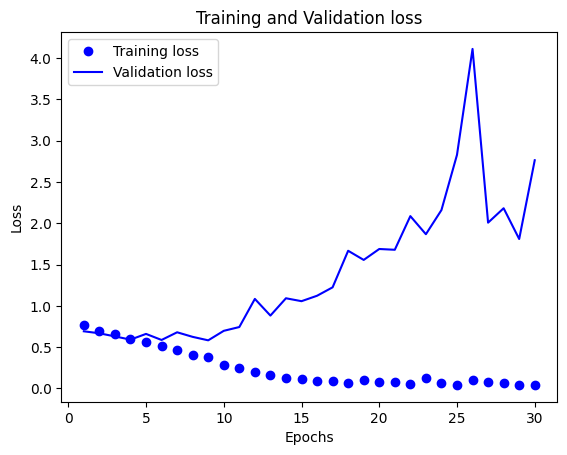

In [32]:
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

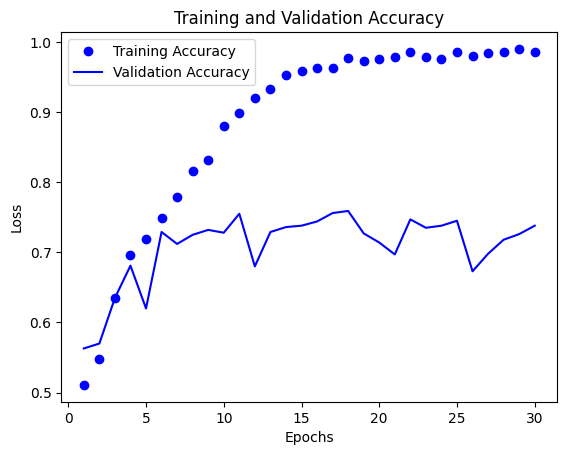

In [34]:
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### Using Data Augmentation
The model is overfitting during training as we cans ee from the above two graphs that the training accuracy is going up contnously when the validation accuracy stop incresing at as like training accuracy. So, we have to do something to reduce the overfitting of the model on training dataset. There are several ways to generalize a model such a adding dropout, weigh regularization such as using lasso or Ridge, adding more training data. Here I will try with another way named **Data Augmentation** which is well knowed for image processing with deep-learning models. 

In [35]:
datagen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, 
                             shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')


#### Displaying some randomly augmented Training Images

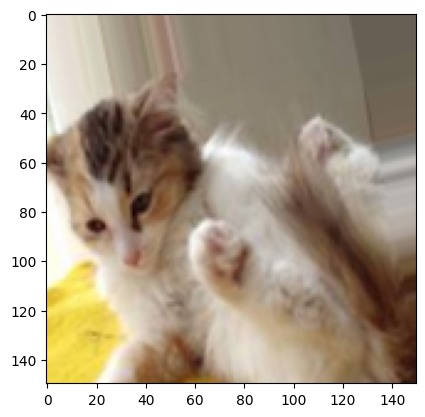

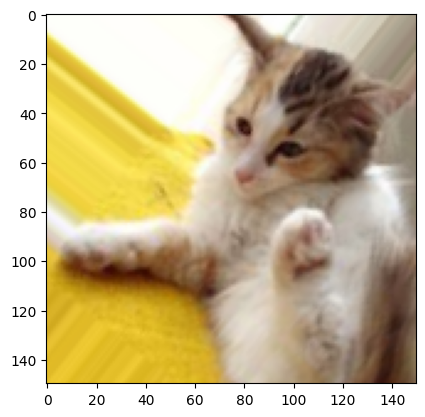

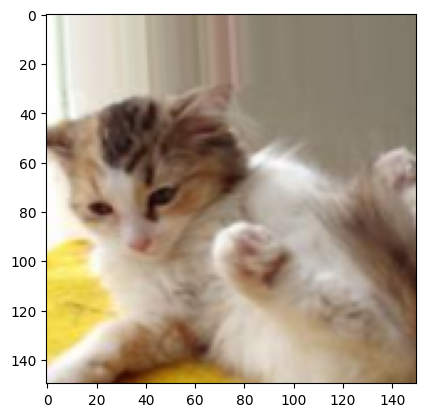

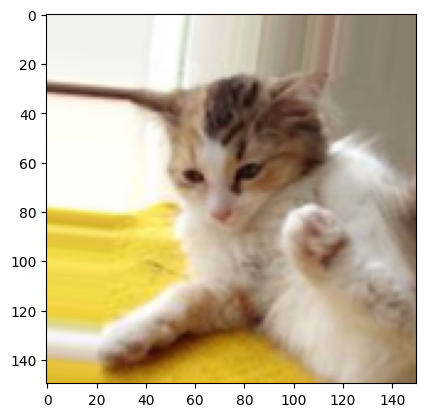

In [46]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[8] # Choose one image to augment

img = Image.open(img_path)
img = img.resize((150, 150))  # Resize the image to the desired target size
x = np.array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(Image.fromarray(np.uint8(batch[0])))
    i += 1
    if i % 4 == 0:
        break
plt.show()


#### Also applying dropout method to our model

In [47]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))

In [52]:
model2.compile(optimizer = RMSprop(learning_rate=0.001), loss = 'binary_crossentropy', metrics= ['acc'])

#### Train the new Model using data-augmentation generators

In [48]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, 
                             shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Validation data should not be augmented 
test_datagen = ImageDataGenerator(rescale=1./255)

In [49]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=32, class_mode= 'binary')

Found 2000 images belonging to 2 classes.


In [50]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=32,
                                                        class_mode= 'binary')

Found 1000 images belonging to 2 classes.


In [55]:
# Finally train the new model after applying Data-augmentation & dropout
history = model2.fit(train_generator, epochs=100, validation_data=validation_generator)

Epoch 1/100
63/63 [==============================] - 21s 340ms/step - loss: 0.7145 - acc: 0.5430 - val_loss: 0.6833 - val_acc: 0.6030
Epoch 2/100
63/63 [==============================] - 22s 345ms/step - loss: 0.6942 - acc: 0.5520 - val_loss: 0.6744 - val_acc: 0.5990
Epoch 3/100
63/63 [==============================] - 23s 368ms/step - loss: 0.6830 - acc: 0.5645 - val_loss: 0.6503 - val_acc: 0.6380
Epoch 4/100
63/63 [==============================] - 25s 401ms/step - loss: 0.6831 - acc: 0.6180 - val_loss: 0.6576 - val_acc: 0.6190
Epoch 5/100
63/63 [==============================] - 26s 411ms/step - loss: 0.6458 - acc: 0.6270 - val_loss: 0.5938 - val_acc: 0.6870
Epoch 6/100
63/63 [==============================] - 25s 390ms/step - loss: 0.6540 - acc: 0.6295 - val_loss: 0.6296 - val_acc: 0.6520
Epoch 7/100
63/63 [==============================] - 26s 415ms/step - loss: 0.6398 - acc: 0.6250 - val_loss: 0.7461 - val_acc: 0.5960
Epoch 8/100
63/63 [==============================] - 26s 414ms

Epoch 62/100
63/63 [==============================] - 27s 421ms/step - loss: 0.4262 - acc: 0.8125 - val_loss: 0.3883 - val_acc: 0.8520
Epoch 63/100
63/63 [==============================] - 27s 421ms/step - loss: 0.4332 - acc: 0.8115 - val_loss: 0.4640 - val_acc: 0.7660
Epoch 64/100
63/63 [==============================] - 27s 423ms/step - loss: 0.4306 - acc: 0.8060 - val_loss: 0.4006 - val_acc: 0.8370
Epoch 65/100
63/63 [==============================] - 27s 422ms/step - loss: 0.4117 - acc: 0.8215 - val_loss: 0.3885 - val_acc: 0.8390
Epoch 66/100
63/63 [==============================] - 27s 426ms/step - loss: 0.4169 - acc: 0.8090 - val_loss: 0.4027 - val_acc: 0.8360
Epoch 67/100
63/63 [==============================] - 27s 424ms/step - loss: 0.4211 - acc: 0.8175 - val_loss: 0.3970 - val_acc: 0.8210
Epoch 68/100
63/63 [==============================] - 27s 425ms/step - loss: 0.4086 - acc: 0.8195 - val_loss: 0.3962 - val_acc: 0.8430
Epoch 69/100
63/63 [==============================] - 2

#### Saving Model 2

In [56]:
model2.save('cats_and_dogs_small_1.h5')

In [57]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc)+1)

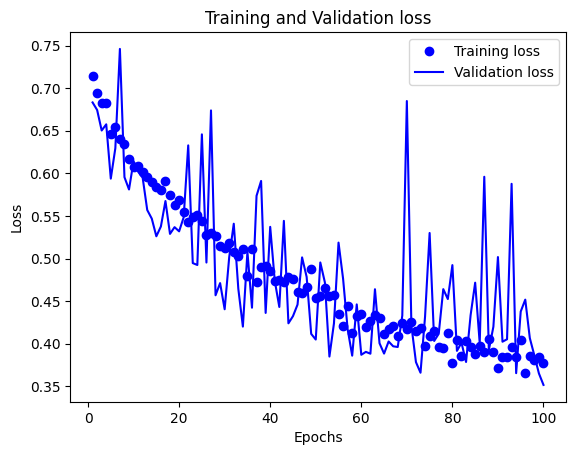

In [61]:
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

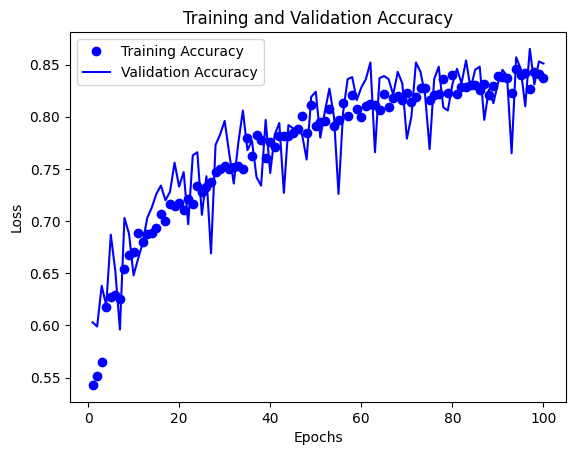

In [60]:
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Feature Extraction
Feature extraction in deep learning refers to the process of using a pre-trained deep neural network to extract meaningful and informative features from raw input data. These features can then be used as input for other machine learning algorithms or to build new models for specific tasks.

In the context of image processing, feature extraction involves using a pre-trained convolutional neural network (CNN) to transform images into a set of abstract representations (features) that capture important patterns, textures, edges, and other relevant information present in the images. These features can be used for tasks such as image classification, object detection, and image similarity.

**Feature extraction is typically performed in two steps:**
- **Pre-training a CNN on a large dataset:** The first step involves training a deep neural network on a large dataset, typically millions of images. This pre-training process aims to learn hierarchical representations of the data, starting from low-level features like edges and textures to more complex features that correspond to specific objects or image parts.

- **Using the pre-trained network for feature extraction:** Once the CNN is pre-trained, it can be used as a feature extractor for new images. Instead of using the CNN for classification (which requires a fully connected layer for specific output classes), the last fully connected layers are removed, leaving only the convolutional layers. The input image is then passed through the CNN, and the output of the last convolutional layer (the extracted features) is used as the representation of the image.

By using a pre-trained CNN for feature extraction, we can benefit from the knowledge learned from the large dataset during pre-training. This often results in better feature representations compared to hand-engineered features. These learned features can be used for various downstream tasks, such as transfer learning, where the pre-trained CNN is adapted or fine-tuned for a specific task with a smaller dataset.

Feature extraction is a fundamental technique in deep learning and has led to significant advancements in various computer vision tasks and natural language processing tasks. It allows leveraging the power of pre-trained models and adapting them to specific tasks, even with limited labeled data.

### Installing the VGG Convulation Base

In [63]:
from keras.applications import VGG16


In [64]:
conv_base = VGG16 (weights = 'imagenet', include_top = False, input_shape = (150 ,150, 3))

58889256/58889256 [==============================] - 10s 0us/step


In [65]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

### Feature Extraction without Data-augmentation

In [66]:
# We know that the
base_dir = 'E:\Keras\Dataset\dogs-vs-cats_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [67]:
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

In [69]:
def features_extract (directory, sample_count):
    features = np.zeros(shape = (sample_count, 4, 4, 512))
    labels = np.zeros(shape = (sample_count))
    generator = datagen.flow_from_directory(directory, target_size= (150, 150), batch_size = batch_size,
                                            class_mode = 'binary')
    
    i = 0
    for input_batch, labels_batch in generator:
        features_batch = conv_base.predict(input_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [72]:
train_features, train_labels = features_extract(train_dir, 2000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 1s 536ms/step


In [73]:
validation_features, validation_labels = features_extract(validation_dir, 1000)

Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 616ms/step


In [74]:
test_features, test_labels = features_extract(test_dir, 1000)

Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 608ms/step


In [75]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

### Define & Train new Densely connected classifier

In [76]:
model2 = models.Sequential()
model2.add(layers.Dense(256, activation = 'relu', input_dim = 4 * 4 * 512))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1, activation = 'sigmoid'))
model2.compile(optimizer = RMSprop(learning_rate=0.00001), loss = 'binary_crossentropy', metrics= ['acc'])

In [78]:
history = model2.fit(train_features, train_labels, epochs = 30, batch_size = 20, validation_data = (validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 2s 14ms/step - loss: 0.6530 - acc: 0.6285 - val_loss: 0.5117 - val_acc: 0.8030
Epoch 2/30
100/100 [==============================] - 1s 11ms/step - loss: 0.5403 - acc: 0.7230 - val_loss: 0.4371 - val_acc: 0.8290
Epoch 3/30
100/100 [==============================] - 1s 12ms/step - loss: 0.4429 - acc: 0.8010 - val_loss: 0.3895 - val_acc: 0.8460
Epoch 4/30
100/100 [==============================] - 1s 14ms/step - loss: 0.4002 - acc: 0.8235 - val_loss: 0.3567 - val_acc: 0.8680
Epoch 5/30
100/100 [==============================] - 1s 13ms/step - loss: 0.3570 - acc: 0.8560 - val_loss: 0.3345 - val_acc: 0.8690
Epoch 6/30
100/100 [==============================] - 1s 13ms/step - loss: 0.3362 - acc: 0.8680 - val_loss: 0.3185 - val_acc: 0.8780
Epoch 7/30
100/100 [==============================] - 2s 15ms/step - loss: 0.3213 - acc: 0.8705 - val_loss: 0.3065 - val_acc: 0.8750
Epoch 8/30
100/100 [==============================] - 1s 14ms/step - 

In [79]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc)+1)

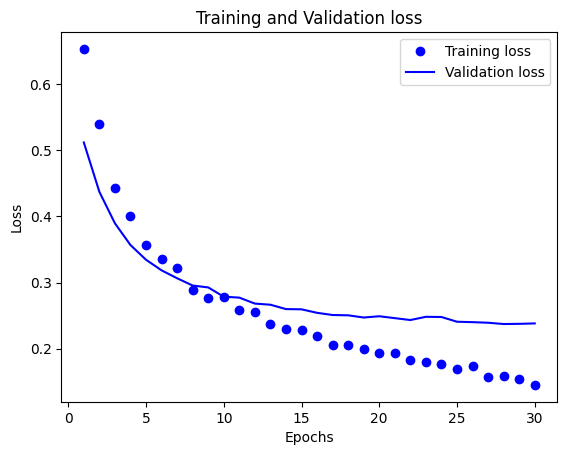

In [80]:
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

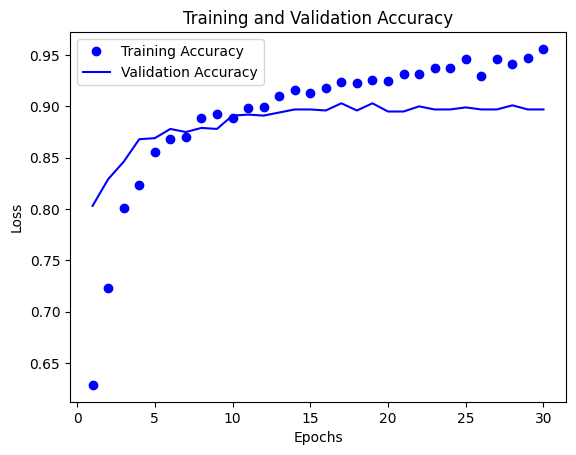

In [81]:
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

**Remarks:** We reach a validation accuracy of around 90%, but plots also indicates that we are overfitting the model almost from the start despite using the dropout method. Because this model does not include the data-augmentation method, which is essential to prevent overfitting when we are training our model with a relatively small dataset.

## Feature Extraction with Data-augmentation

In [83]:
model3 = models.Sequential()
model3.add(conv_base) 
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation = 'relu'))
model3.add(layers.Dense(1, activation = 'sigmoid'))

In [84]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, 
                             shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')

# Validation data should not be augmented 
test_datagen = ImageDataGenerator(rescale=1./255)

In [85]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode= 'binary')

Found 2000 images belonging to 2 classes.


In [86]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode= 'binary')

Found 1000 images belonging to 2 classes.


In [87]:
model3.compile(optimizer = RMSprop(learning_rate=0.00001), loss = 'binary_crossentropy', metrics= ['acc'])

In [89]:
history = model3.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30,
                               validation_data = validation_generator, validation_steps = 50)

Epoch 1/30


C:\Users\tanvi\AppData\Local\Temp\ipykernel_7060\3142367762.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model3.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30,


100/100 [==============================] - 309s 3s/step - loss: 0.4833 - acc: 0.7485 - val_loss: 0.2976 - val_acc: 0.8770
Epoch 2/30
100/100 [==============================] - 373s 4s/step - loss: 0.2841 - acc: 0.8780 - val_loss: 0.2247 - val_acc: 0.9210
Epoch 3/30
100/100 [==============================] - 381s 4s/step - loss: 0.2302 - acc: 0.9090 - val_loss: 0.1307 - val_acc: 0.9390
Epoch 4/30
100/100 [==============================] - 381s 4s/step - loss: 0.1953 - acc: 0.9145 - val_loss: 0.2538 - val_acc: 0.9120
Epoch 5/30
100/100 [==============================] - 381s 4s/step - loss: 0.1647 - acc: 0.9365 - val_loss: 0.1183 - val_acc: 0.9550
Epoch 6/30
100/100 [==============================] - 384s 4s/step - loss: 0.1426 - acc: 0.9430 - val_loss: 0.1159 - val_acc: 0.9560
Epoch 7/30
100/100 [==============================] - 383s 4s/step - loss: 0.1387 - acc: 0.9480 - val_loss: 0.2119 - val_acc: 0.9300
Epoch 8/30
100/100 [==============================] - 374s 4s/step - loss: 0.124

In [90]:
model3.save('cats_and_dogs_small_1.h5')

In [91]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc)+1)

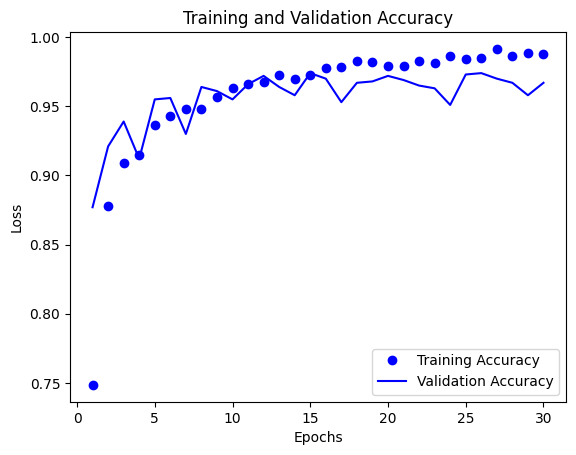

In [92]:
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

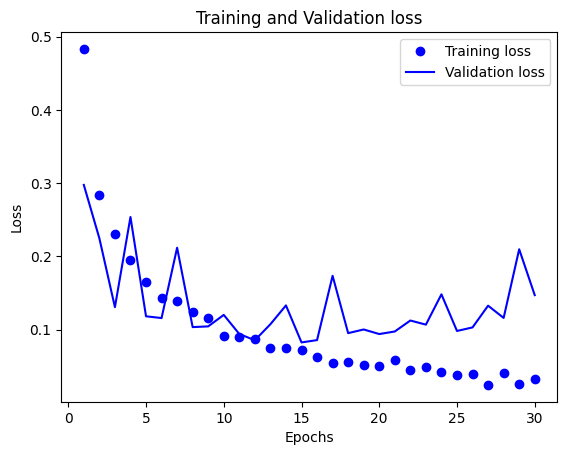

In [93]:
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

**Now as we applied the data-augmentation method, the validation accuuracy of our new model with VGG16 is 96.7% which is quite good than the last one without data-augmentation.**

## Fine Tuning the Model

In [94]:
model4 = models.Sequential()
model4.add(conv_base) 
model4.add(layers.Flatten())
model4.add(layers.Dense(256, activation = 'relu'))
model4.add(layers.Dense(1, activation = 'sigmoid'))

In [95]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [98]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [99]:
model4.compile(optimizer = RMSprop(learning_rate=0.00001), loss = 'binary_crossentropy', metrics= ['acc'])

In [ ]:
history = model4.fit_generator(train_generator, steps_per_epoch = 100, epochs = 100,
                               validation_data = validation_generator, validation_steps = 50)

In [ ]:
model4.save('cats_and_dogs_small_1.h5')

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc)+1)

In [ ]:
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()